# Scikit-learn

_scikit-learn_ (sklearn) es una biblioteca desarrollada en Python, funciona sobre _Numpy, Scipy y matplotlib_; incluye muchos algoritmos de aprendisaje automático (_machine learning_).

## Conjunto de datos (datasets)

Dentro de datasets, sklearn incluye varios conjuntos para pruebas, por ejemplo _Iris_:

Dataset: Iris 

|sepal length|sepal width|petal length|petal width| clase|
|-----------------|--------|-----------|-----------|------|
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|...|...|...|...|...|



    Number of Instances: 150 (50 in each of three classes).
    Class Distribution: 33.3% for each of 3 classes.

In [43]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# iris.data
# iris.target

In [44]:
# Las caracteristicas tomaremos seran:  petal length y petal width
X = iris.data[:, [2, 3]]
# Dado que son tres clases disitintas para iris, obtendremos
# un vector con 0,1 y 3's en y
y = iris.target[:]
print('Etiquetas : ' , np.unique(y))
X.shape

Etiquetas :  [0 1 2]


(150, 2)

## Partición en datos de entrenamiento y prueba.

La funcion `train_test_split` de `model_selection` genera particiones de datos para entrenamiento y prueba para determinar cómo se comporta con datos desconocidos:

- Datos de entrenamiento: Datos que nos serviran para entrenar el modelo.
- Datos de prueba: Datos para pruebas.

### Conveciones

`X_train`: Es el nombre que se le da a la parte de datos que seran para entrenar el modelo. (datos de la variable independiente `x`.

Ver video : https://youtu.be/OPPS0fQdWF0 \
Ver enlace: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [45]:
from sklearn.model_selection import train_test_split
# 30 % de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y,
                                                   random_state=1)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [46]:
# Usando strafify, banlancea que sea la misma proporcion de neustra clases
print("En y      :", np.bincount(y))
print("En y_train:", np.bincount(y_train))

print("En y_test :", np.bincount(y_test))

En y      : [50 50 50]
En y_train: [35 35 35]
En y_test : [15 15 15]


# Escalar o estandarizar

Algo comun es cambiar la dimension de nuestro conjunto de datos. Standarizar nuestro datos para no exista un sesgo
Esto es conocido como escalar los datos, para que tengan valor solo entre -1 y 1

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

@keyword: StandardScaler ( youtube, google)
- https://youtu.be/H5-Gwg1UVtY
- https://youtu.be/Y7m9MyPxcyQ
- https://youtu.be/PwfqPq_YQ_g
- https://youtu.be/g2XsZdwbCCs

### Perceptron de sklearn
Es un modelo lineal, ya que separa de manera lineal a nuestros datos.

Este perceptron usa tecnica llamada one versus all, es decir compara en binario, pero cuando existen más clases, a una le da el valor de 1 y a las demas clases el valor 0 y asi para cada clase.


Por eso mismo, no solo vamos encontrar una sola linea, sino $3$ lineas que dividen a cada una de las clases.


**Observacion**. Esta idea es muy similar a la _distribución hipergeometrica_ de probabilida. La funciona igualmente para $2$ tipos y se desea más clasifica el tipo $1$ para una clase y el tipo $2$ para las demas clases.

Tambien se puede implementar esa funcion con nuestro perceptron hecho anteriormenet usando la idea _one versus all_.

In [48]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)

# Lo vamos entrenas con nuestro datos de entrenamiento, pero los
# estandarizados

# Calculas los pesos correctoa para la clasificacion
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [49]:
# Prediciones: son los valores que obtenemos del producto punto
# de los pesos por las entradas

# Obtendremos los posibles resultados, con las muestras de prueba
# Es decir, en que clase deberia pertecenecer segun los datos de prueba
y_pred = ppn.predict(X_test_std)

print(y_pred)
# https://machinelearningmastery.com/make-predictions-scikit-learn/

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 0 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [50]:
print(y_test)

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [51]:
print("Errores: ", (y_test - y_pred).sum())

Errores:  1


In [52]:
# Ver los datos para la recta que dividen nuestros datos
# Los pesos que calculo del predict x1, x2
ppn.coef_

# Estas son las rectas que se obtienen

array([[-0.10655204, -0.11836728],
       [ 0.31790327, -0.3670884 ],
       [ 0.36018414,  0.30003858]])

In [53]:
# Una medida para calcula exactitud
# Que tan bueno o mal es nuestro modelo entrenado

# En esta forma, tomas los datos de prueba, los utiliza con el modelo
# hace la preccion internamente y los compara con los resultados
print("Exactitud: ", ppn.score(X_test_std, y_test))

Exactitud:  0.9777777777777777


In [54]:
# Otra forma de concerlo porque no viene el metodo score
# es usando metrics
from sklearn.metrics import accuracy_score

# Como no sabe con que comparar, necesitamos y_test 
# y las predicciones sacadas con el modelo, las deben se de las mismas
# dimensiones.
print("Exactitud: ", accuracy_score(y_test, y_pred))

Exactitud:  0.9777777777777777


### Con las muestras de entranamiento

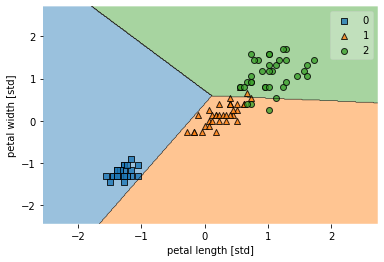

In [55]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Usaremos nuestros datos de entrenamiento
plot_decision_regions(X_train_std, y_train, clf=ppn)
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.show()

La estandariazion, hace una normal centrada en cero y despues la dispersion hacia los acostados, al  igual con el eje y.

- Se puede ver, que hay mas errores que el de prueba.

- En general es al reves, tenemos mas errores en los de prueba y menos en los de entrenamiento (este solo es una exepcion)

### Con las muestras de prueba
Ahora veremos como se comporta, pero esta vez ya no con los de entrenamiento, sino con los de prueba.


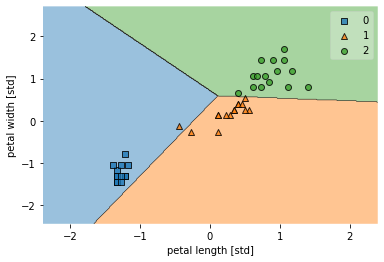

In [56]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Usaremos nuestros datos de entrenamiento
plot_decision_regions(X_test_std, y_test, clf=ppn)
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.show()

- Vemos que las regiones son las mismas, porque el clasificador es el mismo.

- Utiliza los mismo coeficientes de los pesos

- Habiamos visto que anteriormente nos marcara solo un error, precisamente es ese triangulito naranja que esta en la zona azul.

#### Ejemplos para aplicar todo lo aprendido

- https://www.analyticsvidhya.com/blog/2021/04/sklearn-objects-fit-vs-transform-vs-fit_transform-vs-predict-in-scikit-learn/

- https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html